In [11]:
from owslib.csw import CatalogueServiceWeb
from owslib.wms import WebMapService

In [2]:
system_endpoint = 'https://resource-catalogue.185.52.193.87.nip.io/'

In [3]:
csw = CatalogueServiceWeb(system_endpoint,timeout=30)

In [9]:
csw.getrecordbyid(id=['S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE'])

In [12]:
links = csw.records['S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE'].references

In [17]:
for link in links:
    scheme = link['scheme']
    if 'WMS' in scheme:
        wms_endpoint=link['url']
        print(link['url'])

https://data-access.185.52.193.87.nip.io/ows?service=WMS&version=1.3.0&request=GetCapabilities&cql=identifier%3D%22S2B_MSIL2A_20200905T092029_N0214_R093_T34SEJ_20200905T113748.SAFE%22


In [18]:
wms = WebMapService(wms_endpoint, version='1.3.0')

In [19]:
list(wms.contents)

[]

### TODO: Fix the WMS endpoint

In [20]:
wms = WebMapService('http://apps.ecmwf.int/wms/?token=public', version='1.3.0')

In [21]:
wms['composition_co2_surface'].title

'Carbon dioxide at surface [ ppmv ] (provided by CAMS, the Copernicus Atmosphere Monitoring Service)'

In [22]:
wms['composition_co2_surface'].boundingBoxWGS84

(-180.0, -90.0, 180.0, 90.0)

In [23]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [24]:
wms['composition_co2_surface'].styles

{'sh_nipy_spectral_co2_surface': {'title': 'Contour shade (Range: 180.0 / 440.0, nipy_spectral colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_nipy_spectral_co2_surface&width=350&height=50',
  'legend_width': '350',
  'legend_height': '50',
  'legend_format': 'image/png'},
 'sh_Spectral_r_co2_surface': {'title': 'Contour shade (Range: 300 / 490, Spectral_r colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_Spectral_r_co2_surface&width=350&height=50',
  'legend_width': '350',
  'legend_height': '50',
  'legend_format': 'image/png'},
 'sh_RdGy_r_co2_surface': {'title': 'Contour shade (Range: 180.0 / 440.0, RdGy_r colours)',
  'legend': 'https://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_RdGy_r_co2_surface&width=350&height=50',
  'legend_width': '350',
  'legend_height': '50',
  'legend_format'

In [25]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/gif',
 'image/svg+xml',
 'application/pdf',
 'application/postscript',
 'application/vnd.google-earth.kml+xml']

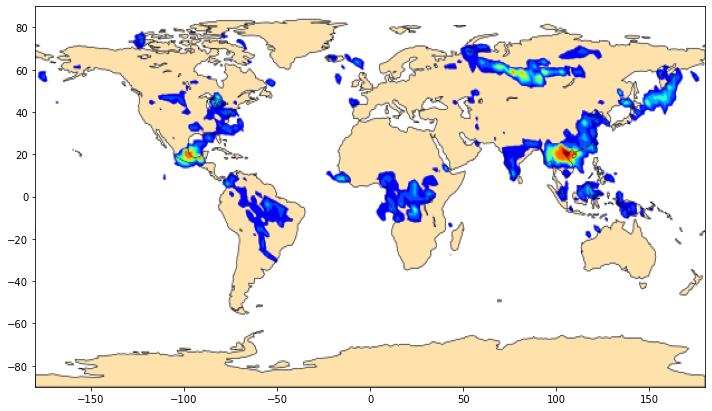

In [26]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(600,300),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()
getMap('foreground',(-180,-90,180,90), 'foreground.png')
getMap('background',(-180,-90,180,90), 'background.png')
getMap('composition_bbaod550',(-180,-90,180,90), 'bbaod550.png')


image1=mpimg.imread('background.png')
image2=mpimg.imread('bbaod550.png')
image3=mpimg.imread('foreground.png')
fig = plt.figure(figsize=(12,7))

img1=plt.imshow(image1,extent=[-180,180,-90,90],aspect='auto')
img2=plt.imshow(image2,extent=[-180,180,-90,90],aspect='auto')
img3=plt.imshow(image3,extent=[-180,180,-90,90],aspect='auto')
plt.show()

### Folium demo

In [27]:
import os
import folium

print(folium.__version__)

0.12.1


In [28]:
m = folium.Map(location=[41, -70], zoom_start=5, tiles=None)


folium.raster_layers.TileLayer(
    tiles='http://{s}.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='google',
    name='google maps',
    max_zoom=20,
    subdomains=['mt0', 'mt1', 'mt2', 'mt3'],
    overlay=False,
    control=True,
).add_to(m)

folium.raster_layers.TileLayer(
    tiles='http://{s}.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='google',
    name='google street view',
    max_zoom=20,
    subdomains=['mt0', 'mt1', 'mt2', 'mt3'],
    overlay=False,
    control=True,
).add_to(m)


folium.raster_layers.WmsTileLayer(
    url='https://demo.boundlessgeo.com/geoserver/ows?',
    layers='nasa:bluemarble',
    name='bluemarble',
    fmt='image/png',
    overlay=False,
    control=True,
).add_to(m)


folium.raster_layers.WmsTileLayer(
    url='http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi',
    name='test',
    fmt='image/png',
    layers='nexrad-n0r-900913',
    attr=u'Weather data © 2012 IEM Nexrad',
    transparent=True,
    overlay=True,
    control=True,
).add_to(m)

folium.LayerControl().add_to(m)

#m.save(os.path.join('results', 'WMS_and_WMTS.html'))

m

### WCS demo